In [1]:
import cv2
import yaml
import pandas as pd
import orbslam3
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
from orbslam_k2 import ORBSLAM3
from sensor_utils import sync_video, read_logs

In [3]:
from sensor_utils import estimate_imu_noise

In [4]:
from main import timedelta_from_string

In [5]:
PROJECT_DIR = Path("..") / ".."
VOCABLUARY_PATH = PROJECT_DIR / "Vocabluary" / "ORBvoc.txt"

VIDEO_FOLDER = Path("2023-05-14") / "video_cam81_flight2_800m"
CONFIG_PATH = VIDEO_FOLDER / "config.yaml"
ORB_CONFIG_PATH = VIDEO_FOLDER / "orb_config.yaml"

DATA_DIR = PROJECT_DIR / "data" / "2023-05-14"

In [6]:
with open(str(CONFIG_PATH), "r") as f:
    config = yaml.load(f, Loader=yaml.BaseLoader)

In [7]:
offset = pd.Timedelta(minutes=0, seconds=0) # timedelta_from_string(config["offset"])
log_start = timedelta_from_string(config["log_start"]) + offset
video_start = timedelta_from_string(config["video_start"]) + offset

In [8]:
vid = cv2.VideoCapture(str(DATA_DIR / config["video_name"]))
vid = sync_video(vid, video_start, 10)

In [9]:
logs = read_logs(DATA_DIR, config["log_name"], log_start=log_start)

In [ ]:
logs

In [10]:
estimate_imu_noise(logs)

IMU.NoiseGyro: 0.10873195988871344
IMU.NoiseAcc: 1.6132326830119297
IMU.GyroWalk: 0.011690780802808385
IMU.AccWalk: 0.19609376875625625
IMU.Frequency: 80.00028803985165


In [12]:
logs.index -= logs.index[0]

In [24]:
(logs.index.total_seconds() * 1e9).astype(int)

Index([           0,     19699000,     20118000,     39237000,     62864000,
           63279000,     78835000,    100014000,    100612000,    119699000,
       ...
       690359240000, 690359504000, 690378819000, 690379194000, 690399906000,
       690418816000, 690419189000, 690439044000, 690459186000, 690460014000],
      dtype='int64', name='microseconds_from_start', length=55238)

In [17]:
import datetime

timestamp = 1403636652463555584
timestamp_in_seconds = timestamp / 1e9  # Convert from nanoseconds to seconds

dt_object = datetime.datetime.fromtimestamp(timestamp_in_seconds)
print(dt_object)


2014-06-24 19:04:12.463556


In [16]:
logs["timestamp"] = logs.index.total_seconds()

In [32]:
import numpy as np

In [27]:
logs[["GyrX", "GyrY", "GyrZ", "AccX", "AccY", "AccZ"]].head()

,GyrX,GyrY,GyrZ,AccX,AccY,AccZ
microseconds_from_start,,,,,,
0 days 00:00:00,-0.015062,0.003976,0.064576,0.118126,-0.041373,-9.771868
0 days 00:00:00.019699,0.003505,0.005789,0.057387,0.056317,0.096426,-9.581341
0 days 00:00:00.020118,0.007014,0.004352,0.057571,0.077467,0.068166,-9.743966
0 days 00:00:00.039237,0.010524,0.002915,0.057755,0.098617,0.039905,-9.906590
0 days 00:00:00.062864,0.027580,0.006464,0.060288,0.130091,0.004829,-9.914318


In [12]:
prev_timestamp = pd.Timedelta(seconds=0)

In [13]:
frame, timestamp = next(vid)

In [19]:
logs.loc[prev_timestamp:timestamp]

,microseconds_from_start,GyrX,GyrY,GyrZ,AccX,AccY,AccZ,DesRoll,Roll,DesPitch,Pitch,DesYaw,Yaw,Lat,Lng,Alt,x,y,z
microseconds_from_start,,,,,,,,,,,,,,,,,,,
0 days 00:00:00,611017983,-0.015062,0.003976,0.064576,0.118126,-0.041373,-9.771868,1.36,1.316667,-0.10,-0.150000,0.0,131.880000,50.396237,30.061421,807.39375,0.000000,0.000000,0.00000
0 days 00:00:00.019699,611037682,0.003505,0.005789,0.057387,0.056317,0.096426,-9.581341,1.36,1.333333,-0.10,-0.140000,0.0,131.920000,50.396236,30.061424,807.39250,-0.096649,0.197341,-0.00125
0 days 00:00:00.020118,611038101,0.007014,0.004352,0.057571,0.077467,0.068166,-9.743966,1.36,1.350000,-0.10,-0.130000,0.0,131.960000,50.396235,30.061427,807.39125,-0.193298,0.394681,-0.00250
0 days 00:00:00.039237,611057220,0.010524,0.002915,0.057755,0.098617,0.039905,-9.906590,1.30,1.360000,-0.09,-0.126667,0.0,131.996667,50.396234,30.061429,807.39000,-0.289947,0.592022,-0.00375
0 days 00:00:00.062864,611080847,0.027580,0.006464,0.060288,0.130091,0.004829,-9.914318,1.24,1.370000,-0.08,-0.123333,0.0,132.033333,50.396233,30.061432,807.38875,-0.386596,0.789363,-0.00500
0 days 00:00:00.063279,611081262,0.037992,0.007545,0.056789,0.096225,0.037750,-9.874369,1.18,1.380000,-0.07,-0.120000,0.0,132.070000,50.396232,30.061435,807.38750,-0.483245,0.986703,-0.00625
0 days 00:00:00.078835,611096818,0.048404,0.008626,0.053290,0.062358,0.070671,-9.834419,1.18,1.456667,-0.07,-0.120000,0.0,132.100000,50.396231,30.061438,807.38625,-0.579895,1.184044,-0.00750


In [17]:
prev_timestamp = timestamp

<Axes: xlabel='x'>

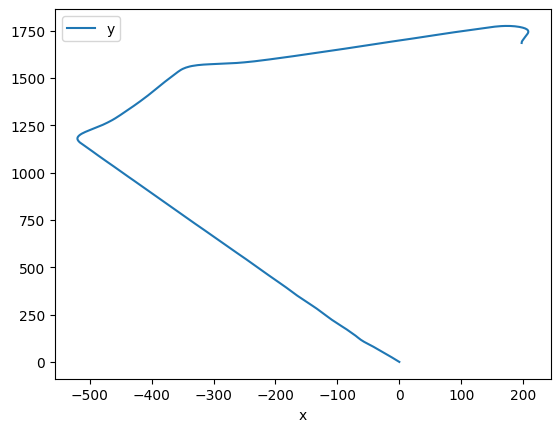

In [22]:
logs.iloc[0:10000].plot(x="x", y="y")

In [ ]:
slam = ORBSLAM3(str(VOCABLUARY_PATH), str(ORB_CONFIG_PATH), orbslam3.Sensor.IMU_MONOCULAR, False)

: 

: 

In [ ]:
for i in tqdm(range(3000)):
    frame = next(vid)
    log = logs.iloc[i]
    slam.step(frame, log)

  8%|▊         | 245/3000 [00:08<01:13, 37.35it/s]

First KF:1082; Map init KF:0
New Map created with 318 points


 14%|█▍        | 429/3000 [00:12<00:56, 45.86it/s]

In [ ]:
pred_trajectory = slam.get_trajectory_df()

In [ ]:
combined_trajectory = pred_trajectory.join(logs, lsuffix="_pred")

In [ ]:
combined_trajectory = combined_trajectory.interpolate()

In [ ]:
def plot_trajectory(df, column_suffix, ax, title, color):
    x_column = f'x{column_suffix}'
    y_column = f'y{column_suffix}'

    # Plot the trajectory data
    ax.plot(df[x_column], df[y_column], label=title, color=color)
    ax.set_title(title)
    ax.set_xlabel('X (North)')
    ax.set_ylabel('Y (East)')
    ax.legend()

    # Add direction arrows for the trajectory
    arrow_scale = 0.2
    arrow_step = len(df)
    for i in range(0, len(df) - 1, 50):
        dx = df[x_column][i + 1] - df[x_column][i]
        dy = df[y_column][i + 1] - df[y_column][i]
        ax.arrow(
            df[x_column][i], df[y_column][i], 
            arrow_scale * dx, arrow_scale * dy, 
            shape='full', lw=0, length_includes_head=True, 
            head_width=0, color=color
        )


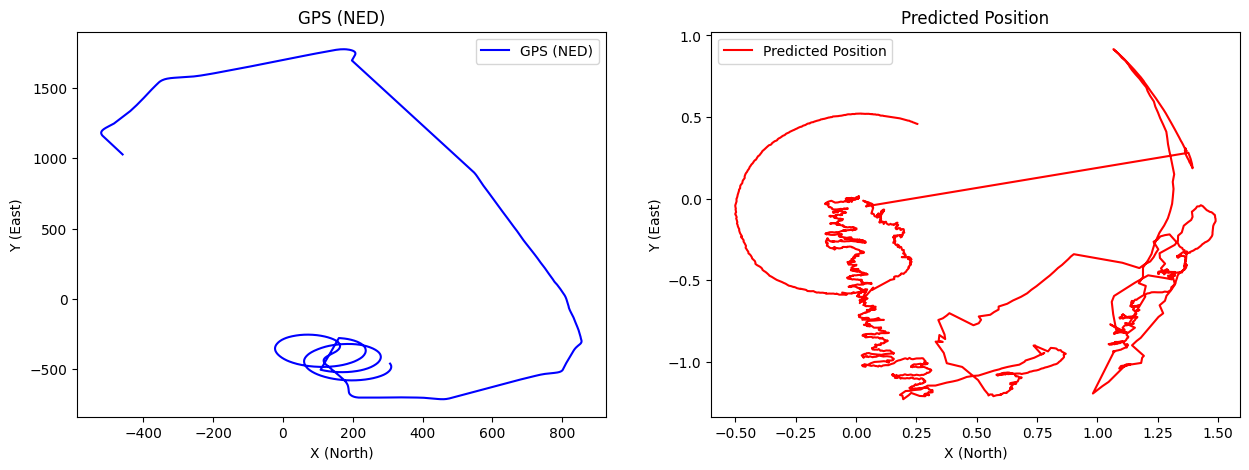

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

plot_trajectory(combined_trajectory, "", ax1, "GPS (NED)", "blue")
plot_trajectory(combined_trajectory, "_pred", ax2, "Predicted Position", "red")

plt.show()
